In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Paths to your confusion-matrix CSVs ===
VIT_CM_PATH = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\transformer\benchmark_confusion_matrix.csv"
VGG_CM_PATH = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\vgg16\benchmark_confusion_matrix.csv"

# === Load confusion matrices ===
vit_cm = pd.read_csv(VIT_CM_PATH, index_col=0)
vgg_cm = pd.read_csv(VGG_CM_PATH, index_col=0)

# === Plot side-by-side with smaller figure and square cells ===
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(
    vit_cm, annot=True, fmt='d', cmap='Blues',
    square=True,  # ensures each cell is square
    ax=axes[0], xticklabels=vit_cm.columns, yticklabels=vit_cm.index
)
axes[0].set_title("ViT Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")
axes[0].tick_params(axis='x', rotation=0)
axes[0].tick_params(axis='y', rotation=0)

sns.heatmap(
    vgg_cm, annot=True, fmt='d', cmap='Greens',
    square=True,  # ensures each cell is square
    ax=axes[1], xticklabels=vgg_cm.columns, yticklabels=vgg_cm.index
)
axes[1].set_title("VGG16 Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")
axes[1].tick_params(axis='x', rotation=0)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()



In [1]:
# === 0. IMPORTS ===
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

Loaded 2200 predictions.

=== Zon vs Schaduw Analyse ===
Accuracy in zon: 0.935
Accuracy in schaduw: 0.822
Macro F1 in zon: 0.921
Macro F1 in schaduw: 0.809


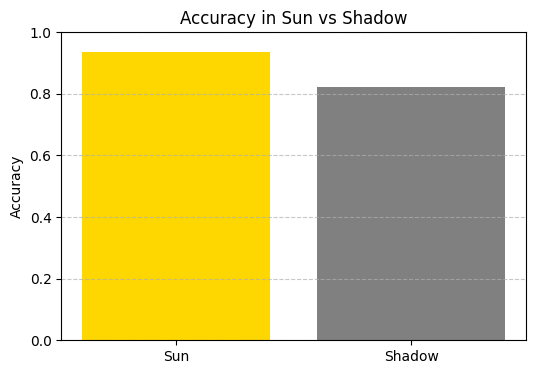

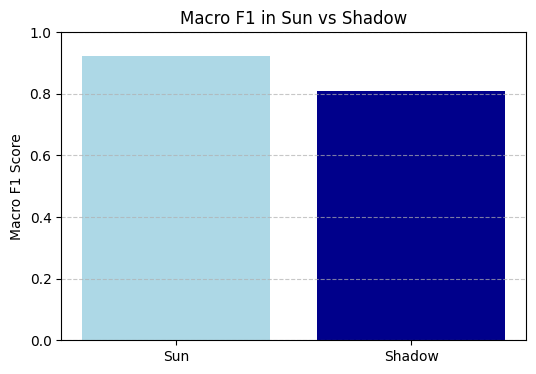

In [2]:
# === 0. IMPORTS ===
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# === 1. CONFIG ===
PREDICTIONS_CSV = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\transformer\predictions_output.csv"  # <-- Predictions bestand
TEST_PATCH_DIR = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\Roboflow\Raw_July\Definitief_29_04\Test_dataset\test_v5_resize"     # <-- Jouw test patches folder

# === 2. DATA LADEN ===
df = pd.read_csv(PREDICTIONS_CSV)
print(f"Loaded {len(df)} predictions.")

# ==========================================================================================
# 6. ZON VS SCHADUW PRESTATIES
# ==========================================================================================
print("\n=== Zon vs Schaduw Analyse ===")
sun_patches = df[df['light_condition_new'] == 'sun']
shadow_patches = df[df['light_condition_new'] == 'shadow']

acc_sun = accuracy_score(sun_patches['true_label'], sun_patches['pred_label'])
acc_shadow = accuracy_score(shadow_patches['true_label'], shadow_patches['pred_label'])

print(f"Accuracy in zon: {acc_sun:.3f}")
print(f"Accuracy in schaduw: {acc_shadow:.3f}")

macroF1_sun = f1_score(sun_patches['true_label'], sun_patches['pred_label'], average='macro')
macroF1_shadow = f1_score(shadow_patches['true_label'], shadow_patches['pred_label'], average='macro')

print(f"Macro F1 in zon: {macroF1_sun:.3f}")
print(f"Macro F1 in schaduw: {macroF1_shadow:.3f}")

# ==========================================================================================
# 11. Accuracy comparison plot zon vs schaduw
# ==========================================================================================

acc_per_condition = {
    'Sun': acc_sun,
    'Shadow': acc_shadow
}

plt.figure(figsize=(6,4))
plt.bar(acc_per_condition.keys(), acc_per_condition.values(), color=['gold', 'gray'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Accuracy in Sun vs Shadow')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ==========================================================================================
# 12. F1 Score comparison plot zon vs schaduw
# ==========================================================================================

f1_per_condition = {
    'Sun': macroF1_sun,
    'Shadow': macroF1_shadow
}

plt.figure(figsize=(6,4))
plt.bar(f1_per_condition.keys(), f1_per_condition.values(), color=['lightblue', 'darkblue'])
plt.ylim(0,1)
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 in Sun vs Shadow')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
import os
import pandas as pd

# === 1. CONFIGURATION ===
METADATA_CSV      = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\Roboflow\metadata_with_brightness.csv"
VGG_WRONG_CSV     = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\vgg16\wrong_predictions.csv"
OUTPUT_CSV        = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\vgg16\predictions_output_vgg16.csv"

# === 2. LOAD METADATA ===
df_meta = pd.read_csv(METADATA_CSV)

# === 3. LOAD VGG16 WRONG PREDICTIONS ===
df_wrong = pd.read_csv(VGG_WRONG_CSV)

# Rename and extract patch_filename up to first '.jpg'
df_wrong = df_wrong.rename(columns={'pred': 'pred_label'})
df_wrong['patch_filename'] = df_wrong['path'].apply(
    lambda p: os.path.basename(p).rsplit('_jpg', 1)[0] + '.jpg'
)

# Keep only patch_filename and pred_label
df_wrong = df_wrong[['patch_filename', 'pred_label']]

# === 4. MERGE AND ASSIGN PREDICTIONS ===
df = df_meta.merge(df_wrong, on='patch_filename', how='left')

# For missing pred_label (correctly predicted by VGG16), copy true_label
df['pred_label'] = df['pred_label'].fillna(df['true_label'])

# === 5. DROP UNUSED COLUMNS ===
drop_cols = ['segment', 'photo_id', 'patch_id', 'x', 'y', 'altitude']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# === 6. SAVE RESULT ===
df.to_csv(OUTPUT_CSV, index=False)
print(f"Saved reconstructed VGG16 predictions to: {OUTPUT_CSV}")


Saved reconstructed VGG16 predictions to: C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\vgg16\predictions_output_vgg16.csv


Loaded 2200 predictions.

=== Zon vs Schaduw Analyse ===
Accuracy in zon: 0.909
Accuracy in schaduw: 0.831
Macro F1 in zon: 0.905
Macro F1 in schaduw: 0.817


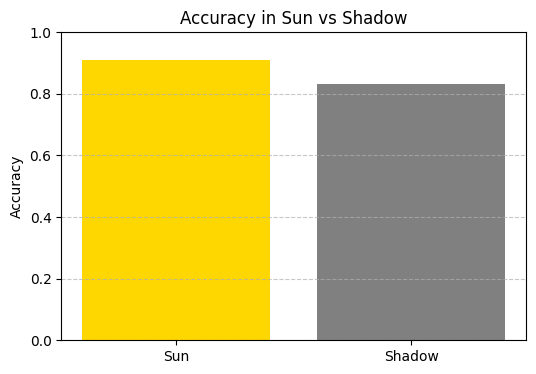

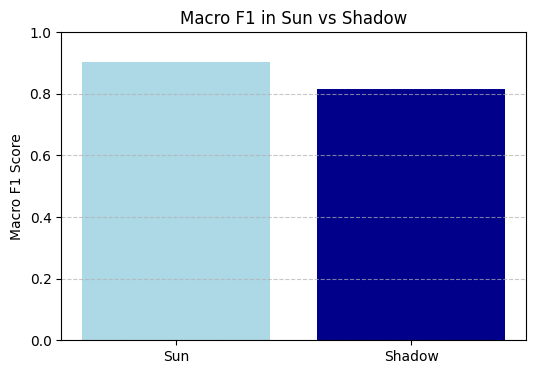

In [19]:
# === 0. IMPORTS ===
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

# === 1. CONFIG ===
PREDICTIONS_CSV = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\vgg16\predictions_output_vgg16.csv"  # <-- Predictions bestand
TEST_PATCH_DIR = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\Roboflow\Raw_July\Definitief_29_04\Test_dataset\test_v5"     # <-- Jouw test patches folder

# === 2. DATA LADEN ===
df = pd.read_csv(PREDICTIONS_CSV)
print(f"Loaded {len(df)} predictions.")

# ==========================================================================================
# 6. ZON VS SCHADUW PRESTATIES
# ==========================================================================================
print("\n=== Zon vs Schaduw Analyse ===")
sun_patches = df[df['light_condition_new'] == 'sun']
shadow_patches = df[df['light_condition_new'] == 'shadow']

acc_sun = accuracy_score(sun_patches['true_label'], sun_patches['pred_label'])
acc_shadow = accuracy_score(shadow_patches['true_label'], shadow_patches['pred_label'])

print(f"Accuracy in zon: {acc_sun:.3f}")
print(f"Accuracy in schaduw: {acc_shadow:.3f}")

macroF1_sun = f1_score(sun_patches['true_label'], sun_patches['pred_label'], average='macro')
macroF1_shadow = f1_score(shadow_patches['true_label'], shadow_patches['pred_label'], average='macro')

print(f"Macro F1 in zon: {macroF1_sun:.3f}")
print(f"Macro F1 in schaduw: {macroF1_shadow:.3f}")

# ==========================================================================================
# 11. Accuracy comparison plot zon vs schaduw
# ==========================================================================================

acc_per_condition = {
    'Sun': acc_sun,
    'Shadow': acc_shadow
}

plt.figure(figsize=(6,4))
plt.bar(acc_per_condition.keys(), acc_per_condition.values(), color=['gold', 'gray'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Accuracy in Sun vs Shadow')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ==========================================================================================
# 12. F1 Score comparison plot zon vs schaduw
# ==========================================================================================

f1_per_condition = {
    'Sun': macroF1_sun,
    'Shadow': macroF1_shadow
}

plt.figure(figsize=(6,4))
plt.bar(f1_per_condition.keys(), f1_per_condition.values(), color=['lightblue', 'darkblue'])
plt.ylim(0,1)
plt.ylabel('Macro F1 Score')
plt.title('Macro F1 in Sun vs Shadow')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

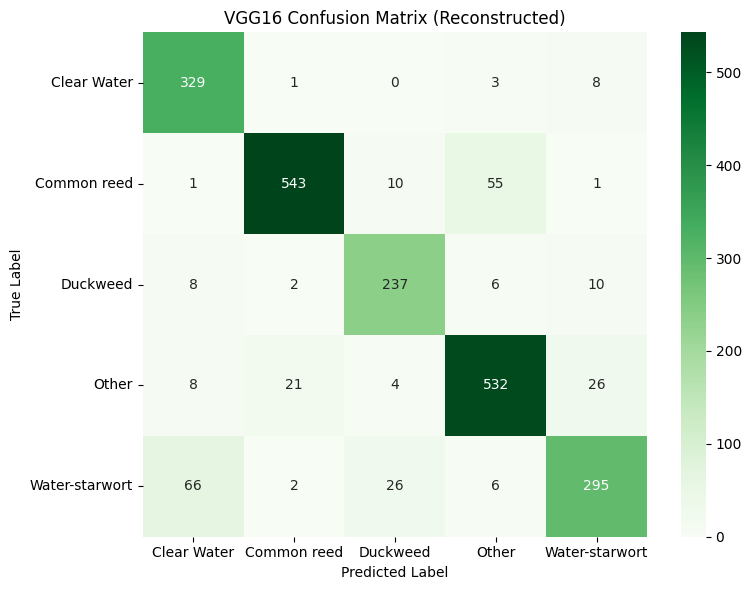

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# === 1. CONFIG ===
VGG_PRED_CSV = r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\vgg16\predictions_output_vgg16.csv"

# === 2. LOAD PREDICTIONS ===
df_vgg = pd.read_csv(VGG_PRED_CSV)

# === 3. COMPUTE CONFUSION MATRIX ===
# Ensure true_label and pred_label columns exist
true = df_vgg['true_label']
pred = df_vgg['pred_label']
labels = sorted(df_vgg['true_label'].unique())

cm = confusion_matrix(true, pred, labels=labels)

# === 4. PLOT ===
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels, square=True)
plt.title('VGG16 Confusion Matrix (Reconstructed)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



=== Transformer Sun vs Shadow Analysis ===

Condition: Sun
  Accuracy          : 0.935
  Macro F1          : 0.921
  Balanced Accuracy : 0.921
  Per-Class Precision & Recall:
                precision    recall  f1-score   support

   Clear Water      0.991     0.888     0.937       241
   Common reed      0.958     0.976     0.967       449
      Duckweed      0.898     0.953     0.925       193
         Other      0.931     0.945     0.938       345
Water-starwort      0.841     0.841     0.841       151

      accuracy                          0.935      1379
     macro avg      0.924     0.921     0.921      1379
  weighted avg      0.936     0.935     0.935      1379



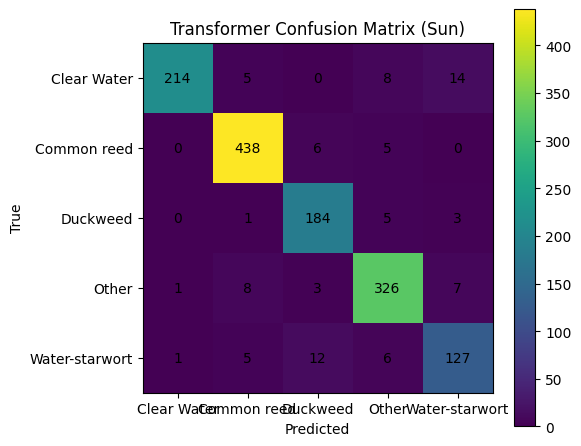


Condition: Shadow
  Accuracy          : 0.822
  Macro F1          : 0.809
  Balanced Accuracy : 0.819
  Per-Class Precision & Recall:
                precision    recall  f1-score   support

   Clear Water      0.729     0.767     0.747       133
   Common reed      0.917     0.962     0.939       183
      Duckweed      0.705     0.831     0.763        89
         Other      0.887     0.857     0.872       230
Water-starwort      0.778     0.677     0.724       186

      accuracy                          0.822       821
     macro avg      0.803     0.819     0.809       821
  weighted avg      0.824     0.822     0.821       821



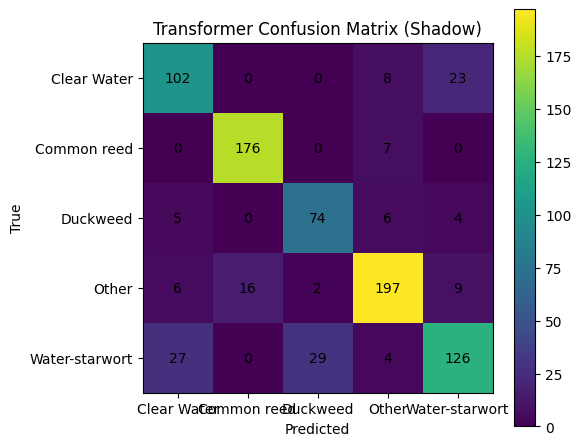


=== VGG16 Sun vs Shadow Analysis ===

Condition: Sun
  Accuracy          : 0.909
  Macro F1          : 0.905
  Balanced Accuracy : 0.907
  Per-Class Precision & Recall:
                precision    recall  f1-score   support

   Clear Water      0.908     0.973     0.939       222
   Common reed      0.944     0.893     0.918       438
      Duckweed      0.899     0.959     0.928       195
         Other      0.883     0.917     0.899       361
Water-starwort      0.896     0.791     0.840       163

      accuracy                          0.909      1379
     macro avg      0.906     0.907     0.905      1379
  weighted avg      0.910     0.909     0.909      1379



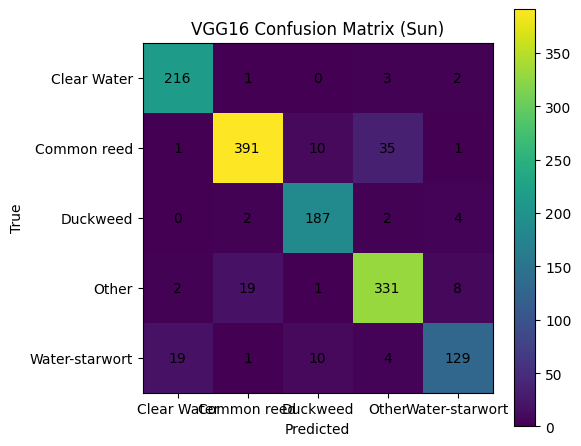


Condition: Shadow
  Accuracy          : 0.831
  Macro F1          : 0.817
  Balanced Accuracy : 0.832
  Per-Class Precision & Recall:
                precision    recall  f1-score   support

   Clear Water      0.649     0.950     0.771       119
   Common reed      0.981     0.884     0.930       172
      Duckweed      0.725     0.735     0.730        68
         Other      0.885     0.874     0.880       230
Water-starwort      0.847     0.716     0.776       232

      accuracy                          0.831       821
     macro avg      0.817     0.832     0.817       821
  weighted avg      0.847     0.831     0.833       821



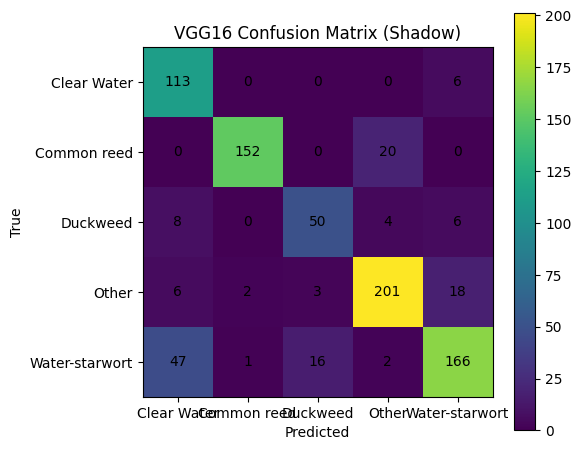

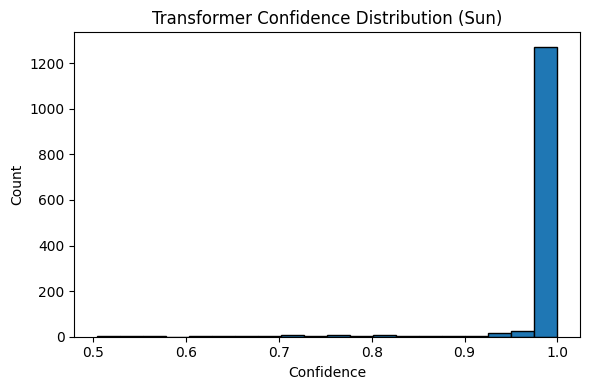

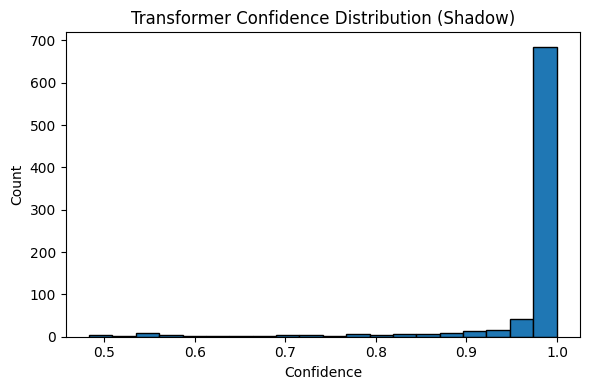

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, balanced_accuracy_score
)

# === 1. CONFIGURATION ===
FILES = {
    "Transformer": r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\transformer\predictions_output.csv",
    "VGG16":       r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\All_results\vgg16\predictions_output_vgg16.csv"
}

# === 2. LOAD DATA ===
dfs = {name: pd.read_csv(path) for name, path in FILES.items()}

# === 3. METRIC COMPUTATIONS BY LIGHT CONDITION ===
for model_name, df in dfs.items():
    print(f"\n=== {model_name} Sun vs Shadow Analysis ===")
    for cond in ["sun", "shadow"]:
        subset = df[df["light_condition_new"] == cond]
        true = subset["true_label"]
        pred = subset["pred_label"]
        acc = accuracy_score(true, pred)
        mF1 = f1_score(true, pred, average="macro")
        bAcc = balanced_accuracy_score(true, pred)
        
        print(f"\nCondition: {cond.title()}")
        print(f"  Accuracy          : {acc:.3f}")
        print(f"  Macro F1          : {mF1:.3f}")
        print(f"  Balanced Accuracy : {bAcc:.3f}")
        print("  Per-Class Precision & Recall:")
        print(classification_report(true, pred, digits=3))

        # Confusion Matrix
        labels = sorted(df["true_label"].unique())
        cm = confusion_matrix(true, pred, labels=labels)
        fig, ax = plt.subplots(figsize=(6,5))
        im = ax.imshow(cm, interpolation='nearest')
        ax.set_title(f"{model_name} Confusion Matrix ({cond.title()})")
        ax.set_xticks(np.arange(len(labels)))
        ax.set_yticks(np.arange(len(labels)))
        ax.set_xticklabels(labels, rotation=0)
        ax.set_yticklabels(labels, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        for i in range(len(labels)):
            for j in range(len(labels)):
                ax.text(j, i, f"{cm[i, j]:d}", ha="center", va="center")
        plt.colorbar(im, ax=ax)
        plt.tight_layout()
        plt.show()

# === 4. TRANSFORMER CONFIDENCE DISTRIBUTIONS ===
df_t = dfs["Transformer"]
for cond in ["sun", "shadow"]:
    subset = df_t[df_t["light_condition_new"] == cond]
    plt.figure(figsize=(6,4))
    plt.hist(subset["confidence"], bins=20, edgecolor='black')
    plt.title(f"Transformer Confidence Distribution ({cond.title()})")
    plt.xlabel("Confidence")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


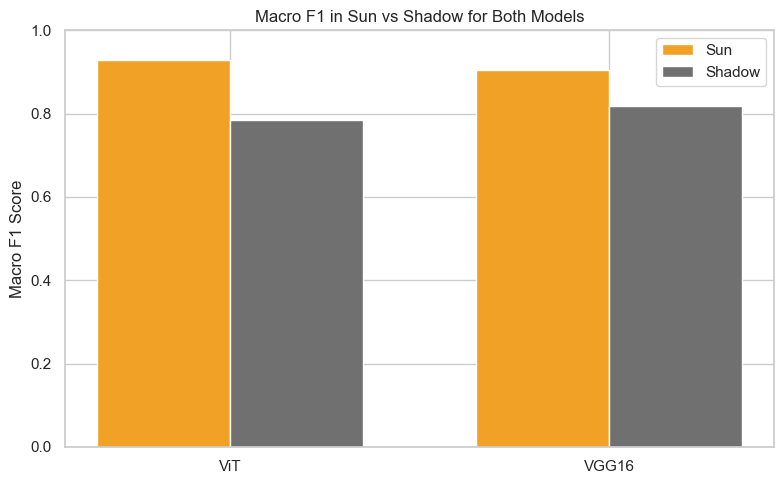

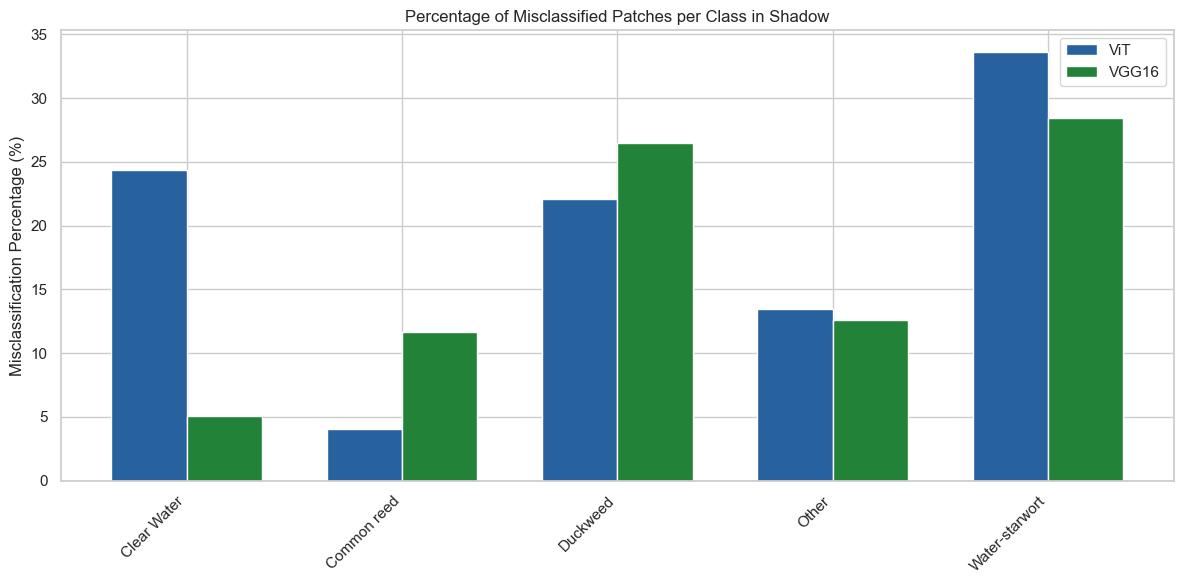

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score

# ─── 1. CONFIGURATION ─────────────────────────────────────────────────────────
sns.set_theme(style="whitegrid")

FILES = {
    "ViT":  r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\Roboflow\Raw_July\All_results\ViT\predictions_output.csv",
    "VGG16": r"C:\Users\Sander\OneDrive - UGent\Semester_2\Masterproef\Thesis_ML\Roboflow\Raw_July\All_results\vgg16\predictions_output_vgg16.csv"
}

# ─── 2. LOAD PREDICTIONS ───────────────────────────────────────────────────────
dfs = {name: pd.read_csv(path) for name, path in FILES.items()}

# ─── 3. COMPUTE MACRO F1 FOR SUN VS SHADOW ────────────────────────────────────
conditions = ["sun", "shadow"]
models = list(dfs.keys())
macro_f1 = {
    model: {
        cond: f1_score(
            dfs[model][dfs[model]["light_condition_new"] == cond]["true_label"],
            dfs[model][dfs[model]["light_condition_new"] == cond]["pred_label"],
            average="macro"
        )
        for cond in conditions
    }
    for model in models
}

# ─── 4. BAR PLOT: Macro F1 in Sun vs Shadow ──────────────────────────────────
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
sun_vals = [macro_f1[m]["sun"] for m in models]
shadow_vals = [macro_f1[m]["shadow"] for m in models]

ax.bar(x - width/2, sun_vals, width, label="Sun",     color="#f1a226")
ax.bar(x + width/2, shadow_vals, width, label="Shadow", color="#707070")

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_ylabel("Macro F1 Score")
ax.set_ylim(0, 1)
ax.set_title("Macro F1 in Sun vs Shadow for Both Models")
ax.legend()
plt.tight_layout()
plt.savefig("figure1.png", dpi=300, bbox_inches="tight")
plt.show()

# ─── 5. MISCLASSIFICATION PERCENTAGES PER CLASS IN SHADOW ───────────────────
classes = sorted(dfs[models[0]]["true_label"].unique())

mis_percent = {}
for model, df in dfs.items():
    shadow = df[df["light_condition_new"] == "shadow"]
    total_per_class = shadow.groupby("true_label").size()
    mis_per_class = shadow[shadow["true_label"] != shadow["pred_label"]].groupby("true_label").size()
    percent = (mis_per_class / total_per_class * 100).reindex(classes).fillna(0)
    mis_percent[model] = percent.values

class_indices = np.arange(len(classes))
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(class_indices - width/2, mis_percent["ViT"],   width, label="ViT",   color="#27619e")  # dark blue
ax.bar(class_indices + width/2, mis_percent["VGG16"], width, label="VGG16", color="#228238")  # dark green

ax.set_xticks(class_indices)
ax.set_xticklabels(classes, rotation=45, ha="right")
ax.set_ylabel("Misclassification Percentage (%)")
ax.set_title("Percentage of Misclassified Patches per Class in Shadow")
ax.legend()
plt.tight_layout()
plt.savefig("figure2.png", dpi=300, bbox_inches="tight")

plt.show()
